# Cheat sheet

#### Models
1. Linear Regression
2. Locally Weighted Linear Regression
3. Logistic Regression
4. Softmax Regression
5. Gaussian Discriminant Analysis/(Multinomial Naive Bayes)
6. Support Vector Machines

#### Learning Algorithms
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. MiniBatch Gradient Descent
4. Newton's Method

#### Preprocessing
1. Standard Scaler
2. Min-Max Scaler
3. Polynomial Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Regression

In [2]:
class LinearRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = 1/2*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        else:
            J = 1/(2*X.shape[0])*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = X.T@(self.h(X,theta)-y)
        else:
            dJ = X.T@(self.h(X,theta)-y)/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        gradient = []
        theta = initial_theta
        iteration = 0
        for n in range(max_iteration):
            cost.append(self.cost(X,y,theta,average))
            gradient.append(self.gradient(X,y,theta,average))
            theta = theta - alpha*gradient[-1]
            iteration_no = n+1
        cost = np.array(cost)
        gradient = np.array(gradient)
        return theta,cost,gradient,iteration_no
    
#5. normal equation
    def normal_equation(self, X, y):
        theta = np.linalg.inv(X.T@X)@X.T@y
        return theta
            
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        return prediction
    
#6. score/error calculation
    def mean_squared_error(self,X,y,theta):
        mse = self.cost(X,y,theta,average = True)*2
        return mse
        
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(1,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

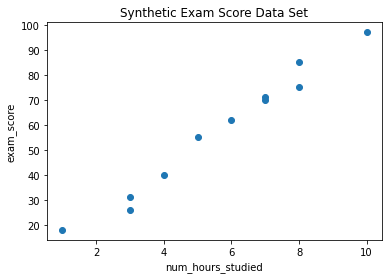

In [3]:
# Independent variable

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable

exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data

plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

In [4]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


In [5]:
LR = LinearRegressionModel()

alpha = 0.001
max_iteration = 100000
initial_theta = np.zeros(2)

theta,cost,gradient,iteration = LR.batch_gd(X,y,initial_theta,max_iteration,alpha,average = True)

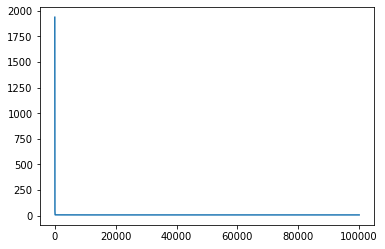

In [6]:
LR.plot_cost(cost,iteration)

In [7]:
theta2 = LR.normal_equation(X,y)
print(theta)
print(LR.mean_squared_error(X,y,theta))
print(theta2)
print(LR.mean_squared_error(X,y,theta2))

[4.27819535 9.40225566]
12.271701982228306
[4.27819549 9.40225564]
12.271701982228299


In [8]:
x_series = np.linspace(0,10,100)
print(x_series.shape)
x_series = np.insert(x_series[:,np.newaxis],0,1, axis=1)
print(x_series.shape)
y_pred = LR.predict(x_series, theta)
y_pred2 = LR.predict(x_series,theta2)

(100,)
(100, 2)


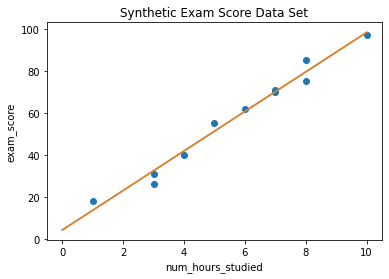

In [9]:
plt.scatter(num_hours_studied, exam_score)
plt.plot(x_series[:,1],y_pred)
plt.plot(x_series[:,1],y_pred2)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

## 2. Locally Weighted Linear Regression

In [10]:
class LWLRModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
    
#2. Weights
    def w(self,X,x,tau):
        w = np.exp(-(np.sum(((X-x)**2),axis=1)/(2*(tau**2))))
        return w
    
#5. normal equation
    def normal_equation(self, X, y, w):
        W = np.diag(w)
        theta = np.linalg.inv(X.T@W@X)@X.T@W@y
        return theta
            
#5. predict
    def predict_point(self,X,x,tau):
        w = self.w(X,x,tau)
        theta = self.normal_equation(X, y, w)
        prediction = self.h(x,theta)
        return prediction
    
    def predict_multiple(self,X,x,tau):
        m_pred = x.shape[0]
        predictions = []
        for ix in range(m_pred):
            xx = x[ix]
            predictions.append(self.predict_point(X,xx,tau))
        predictions = np.array(predictions)
        return predictions

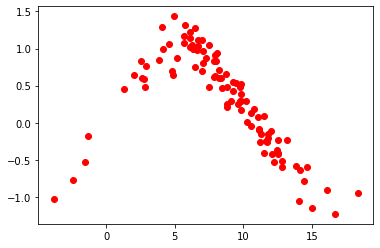

In [11]:
n = 100
x = np.random.normal(10, 5, [n,1])
y = np.sin(x/3.5) + np.random.normal(0,0.2, [n,1])

plt.plot(x,y,'ro')

In [12]:
X = np.insert(x,0,1,axis=1)

LWLR = LWLRModel()
LWLR.predict_point(X,np.array([1,4]),1)

array([0.89429309])

In [13]:
x_series = np.linspace(-5,20,100)
x_series = np.insert(x_series[:,np.newaxis],0,1,axis=1)
print(x_series.shape)

y_pred = LWLR.predict_multiple(X,x_series,3)

(100, 2)


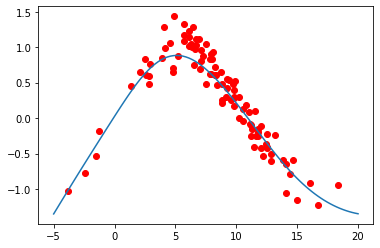

In [14]:
plt.plot(x,y,'ro')
plt.plot(x_series[:,1],y_pred)

## 3. Logistic Regression

In [15]:
class LogisticRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = 1/(1+np.exp(-X@theta))
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))
        else:
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        gradient = []
        theta = initial_theta
        iteration = 0
        for n in range(max_iteration):
            cost.append(self.cost(X,y,theta,average))
            gradient.append(self.gradient(X,y,theta,average))
            theta = theta - alpha*gradient[-1]
            iteration_no = n+1
        cost = np.array(cost)
        gradient = np.array(gradient)
        return theta,cost,gradient,iteration_no
    
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        prediction[prediction >= 0.5] = 1
        prediction[prediction < 0.5] = 0
        return prediction
    
#6. score/error calculation
    def r_squared(self,y,y_pred):
        r_square = 1 - ((np.square(y - y_pred)).sum())/((np.square(y - y.mean())).sum())
        return r_square
    
    def accuracy(self,y,y_pred):
        acc = (y == y_pred).sum()/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(1,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [16]:
data = np.loadtxt('ex2data1.txt',delimiter = ',')

In [17]:
X = data[:,0:2]
y = data[:,2]

mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

X = (X-mean)/std

X = np.insert(X,0,1,axis=1)

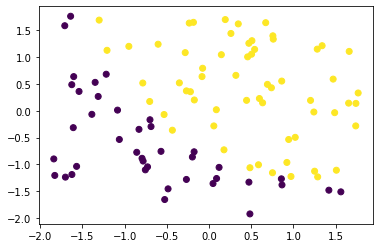

In [18]:
plt.scatter(X[:,1],X[:,2],c=y)

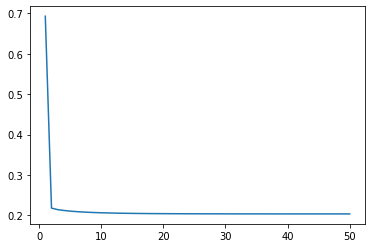

In [19]:
Log = LogisticRegressionModel()

iterations = 50
alpha = 10
initial_theta = np.zeros(3)

theta,cost,gradient,iteration_no = Log.batch_gd(X,y,initial_theta,iterations,alpha,average=True)

Log.plot_cost(cost,iteration_no)

In [20]:
y_pred = Log.predict(X,theta)
Log.accuracy(y,y_pred)

0.89

In [21]:
print(y_pred)

[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


In [22]:
cost[-1]

0.20351178645420576

## 4. Softmax Regression


In [28]:
a = np.array([[1,2,3],[6,4,5]])
np.argmax(a,axis=1)

array([2, 0])

In [152]:
class SoftmaxRegressionModel:
    def Y(self,y):
        m = len(y)
        k = len(np.unique(y))
        Y = np.zeros((m,k))
        for j,kk in enumerate(np.unique(y)):
            Y[y==kk,j] = 1
        return Y
    
    def y(self,Y):
        y = np.argmax(Y,axis=1)
        return y
    
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = np.exp(X@theta)/np.sum(np.exp(X@theta),axis=1)[:,np.newaxis]
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -np.sum(y*np.log(self.h(X,theta)))
        else:
            J = -np.sum(y*np.log(self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        gradient = []
        theta = initial_theta
        iteration = 0
        for n in range(max_iteration):
            cost.append(self.cost(X,y,theta,average))
            gradient.append(self.gradient(X,y,theta,average))
            theta = theta - alpha*gradient[-1]
            iteration_no = n+1
        cost = np.array(cost)
        gradient = np.array(gradient)
        return theta,cost,gradient,iteration_no
    
#5. predict
    def predict_Y(self,X,theta):
        prediction = self.h(X,theta)
        prediction = prediction/np.max(prediction,axis=1)[:,np.newaxis]
        prediction[prediction < 1] = 0
        return prediction
    
    def predict_y(self,X,theta):
        prediction = self.h(X,theta)
        y = self.y(prediction)
        return y
    
#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(1,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [153]:
#IMPORT DATA
import pandas as pd

def replaceKeys(series):
    series_dict = {}
    for i,u in enumerate(series.unique()):
        series_dict[u] = i
    return series.replace(series_dict), series_dict

data = pd.read_csv("gender_height_weight.csv") 

gender_dict = {}
data['Gender'], gender_dict = replaceKeys(data['Gender'])
print(data.columns)

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')


In [154]:
#Split Data

X_all = (data[['Gender','Height','Weight']]).dropna().astype(float)
columns = X_all.columns

ix = np.arange(0,X_all.shape[0])
np.random.shuffle(ix)
percentage = 0.7

X_train = X_all[:int(percentage*X_all.shape[0])]
X_test = X_all[int(percentage*X_all.shape[0]):]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_norm = (X_train-mean)/std
X_norm_test = (X_test-mean)/std
X_norm.insert(0,"Intercept",1)
X_norm_test.insert(0,"intercept",1)

print(X_norm.head())
print()
y = data['Index'].astype(float)
print(y.head())
y_train = y[:int(percentage*X_all.shape[0])]
y_test = y[int(percentage*X_all.shape[0]):]

m,n = X_norm.shape

k = y.unique().size

   Intercept    Gender    Height    Weight
0          1 -0.994302  0.228220 -0.313398
1          1 -0.994302  1.137980 -0.596102
2          1  1.005731  0.895377  0.126364
3          1  1.005731  1.501884 -0.062105
4          1 -0.994302 -1.288047 -1.412804

0    4.0
1    2.0
2    4.0
3    3.0
4    3.0
Name: Index, dtype: float64


In [155]:

k = len(y.unique())

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

In [156]:
SR = SoftmaxRegressionModel()

yy = SR.Y(y_train.values)

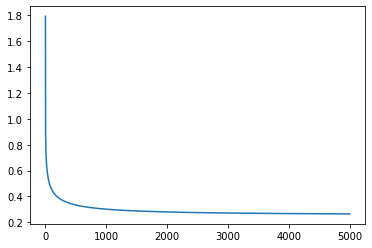

In [157]:
theta_initial = np.ones((n,k))

alpha = 5
iterations = 5000


theta,cost,grad,iteration_no = SR.batch_gd(X_norm.values,yy,theta_initial,iterations,alpha,average=True)
SR.plot_cost(cost,iteration_no)

In [161]:
y_pred = SR.predict_y(X_norm_test.values,theta)

In [162]:
SR.accuracy(y_pred, y_test.values)

0.9333333333333333

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])